In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 

In [17]:
dfb = pd.read_csv('c:/crs/proj/2022_runup/beaches.csv', index_col=0, header=0).T
dfb

name,HoM,PeaIs,MadB
wx,BOX,MHX,TBW
site_ID,1572,6024,3665
record,125,289,62
sl_lon,289.921,284.522,277.198
sl_lat,42.0511,35.6713,27.8008
toe,6.3,3.34,1.34
crest,17.0,5.88,2.16
slope,0.1027,0.086,0.0493
95_up,0.1532,0.1363,0.0787
95_low,0.0522,0.0358,0.0199


In [18]:
dfb['HoM']['slope']

0.1027

In [2]:
df_hom = pd.read_csv('c:/crs/proj/2022_runup/hom_stats.csv', delim_whitespace=True, index_col=0, header=0).T
df_hom

var,H_s,T_p,Dir,Dir_scaled,H0L0,Iribarren,WL,subtidal,tides,runup,runup95,TWL,TWL95
mean,0.969,6.08,22.6,21.1,79.0,0.992,-0.0278,-0.0278,-0.000145,0.696,0.973,0.669,0.945
std,0.606,1.95,46.7,43.8,69.9,0.274,0.8450,0.0941,0.829000,0.378,0.528,0.923,0.993
5,0.323,3.21,44.8,39.1,16.4,0.639,-1.2900,-0.1830,-1.230000,0.247,0.346,-0.743,-0.571
16,0.454,4.08,43.4,36.2,26.1,0.729,-1.0000,-0.1050,-0.960000,0.359,0.502,-0.370,-0.148
50,0.812,5.92,19.8,22.2,58.5,0.948,-0.0218,-0.0258,0.005960,0.613,0.857,0.683,0.955
85,1.520,8.16,57.7,63.6,133.0,1.270,0.9560,0.0505,0.973000,1.050,1.470,1.670,1.980
95,2.110,9.52,45.4,52.5,210.0,1.500,1.2400,0.1200,1.240000,1.420,1.990,2.120,2.560
99,3.100,11.20,45.5,48.8,349.0,1.820,1.5000,0.2320,1.480000,1.940,2.720,2.690,3.340


In [3]:
df_hom['T_p']['mean']

6.08

['A17', 'D20', 'H86', 'NH91', 'P14', 'P16', 'R01', 'S06', 'S11', 'V12']
R2[i]=A17(0.812, 54.718294494218604)
R2[i]=D20(0.812, 54.718294494218604)
R2[i]=H86(0.812, 54.718294494218604)
R2[i]=NH91(0.812, 54.718294494218604)
R2[i]=P14(0.812, 54.718294494218604)
R2[i]=P16(0.812, 54.718294494218604)
R2[i]=R01(0.812, 54.718294494218604)
R2[i]=S06(0.812, 54.718294494218604)
R2[i]=S11(0.812, 54.718294494218604)
R2[i]=V12(0.812, 54.718294494218604)
[0.13198041 2.10292165 0.27305024 0.66547095 0.28521666 2.07356436
 0.25452067 0.27806287 0.67161896 0.08007538]


{'whiskers': [<matplotlib.lines.Line2D at 0x22f090b5820>,
 'caps': [<matplotlib.lines.Line2D at 0x22f090b5d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f090b5550>],
 'medians': [<matplotlib.lines.Line2D at 0x22f090c3340>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f090c3610>],
 'means': []}

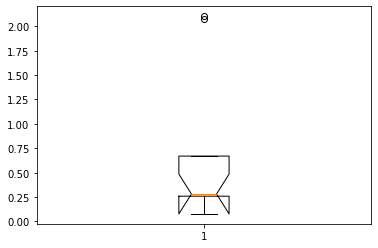

In [14]:
# Range of runup values for median wave conditions
Hs = df_hom['H_s']['50']
Tp = df_hom['T_p']['50']
Lo = calc_L0(Tp)
beta = df_hom['T_p']['50']

print(func_list)
R2 = np.empty(len(func_list))

for i, item in enumerate( func_list):
    cmd = "R2[i]={}({}, {})".format(item, Hs, Lo)
    print(cmd)
    exec(cmd)
    
print(R2)

plt.boxplot(R2,notch=True)